# **Project - Restaurant Data Analysis At Cognifyz Technologies**

#### **Project Type -** Explanatory Data Analysis
#### **Industry -** Cognifyz Technologies
#### **Name -** Diana Auma
#### **Level -** 2

## **Project Summary**

**Task 1: Table Booking and Online Delivery Analysis**

Task 1 focuses on exploring table booking and online delivery services among restaurants. We determine the percentage of restaurants offering these services, compare the average ratings of restaurants with and without table booking, and analyze the availability of online delivery across different price ranges.

**Task 2: Price Range Analysis**

In Task 2, we delve into analyzing price ranges across restaurants. We determine the most common price range, calculate the average rating for each price range, and identify the color representing the highest average rating among different price ranges.

**Task 3: Feature Engineering**

Task 3 involves feature engineering to enrich our dataset. We extract additional features such as the length of restaurant names or addresses and create new features like "Has Table Booking" and "Has Online Delivery" by encoding categorical variables.

**Key Activities:**

**Table Booking and Online Delivery Analysis:**

Determine the percentage of restaurants offering services.

Compare average ratings based on table booking.

Analyze online delivery availability across price ranges.

**Price Range Analysis:**

Determine the most common price range.

Calculate average ratings for each price range.

Identify color representation for highest average rating.

**Feature Engineering:**

Extract additional features from existing columns.

Create new features by encoding categorical variables.

**Expected Outputs:**
Percentage of restaurants offering table booking and online delivery.

Comparison of average ratings based on table booking.

Analysis of online delivery availability across price ranges.

Most common price range and its average rating.

Color representation for the highest average rating among price ranges.

Enriched dataset with additional and encoded features.







#### **GitHub Link:** [Restaurant EDA](https://github.com/auma23/Cognifyz-Technologies-Intern)

### **Task 1: Table Booking and Online Delivery Analysis**

In [33]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore all warnings
import warnings

warnings.filterwarnings('ignore')


In [45]:
#import the dataset
df = pd.read_csv("/content/Dataset .csv")


In [4]:
# Restaurants with table booking and online delivery
total_restaurants = len(df)
total_restaurants = len(df)

df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

table_booking_percentage = (df['Has Table booking'].sum() / total_restaurants) * 100
online_delivery_percentage = (df['Has Online delivery'].sum() / total_restaurants) * 100

print("Percentage of restaurants offering table booking: {:.2f}%".format(table_booking_percentage))
print("Percentage of restaurants offering online delivery: {:.2f}%".format(online_delivery_percentage))


Percentage of restaurants offering table booking: 12.12%
Percentage of restaurants offering online delivery: 25.66%


In [5]:
# Average ratings of restaurants with and without table booking services
with_table_booking_avg_rating = df[df['Has Table booking'] == 1]['Aggregate rating'].mean()
without_table_booking_avg_rating = df[df['Has Table booking'] == 0]['Aggregate rating'].mean()

print("Average rating of restaurants with table booking: {:.2f}".format(with_table_booking_avg_rating))
print("Average rating of restaurants without table booking: {:.2f}".format(without_table_booking_avg_rating))


Average rating of restaurants with table booking: 3.44
Average rating of restaurants without table booking: 2.56


In [6]:
# Online delivery among restaurants with different price ranges
price_ranges = pd.cut(df['Price range'], bins=3, labels=['Low', 'Medium', 'High'])
online_delivery_by_price = df.groupby(price_ranges)['Has Online delivery'].mean()

print("Availability of online delivery by price range:")
print(online_delivery_by_price)

Availability of online delivery by price range:
Price range
Low       0.262935
Medium    0.291903
High      0.090444
Name: Has Online delivery, dtype: float64


###**Task 2: Price Range Analysis**

In [7]:
# Most common price range
most_common_price_range = df['Price range'].mode()[0]
most_common_price_range


1

In [8]:
# Average rating for each price range
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
average_rating_by_price_range

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

In [31]:
# Identify the color representing the highest average rating
highest_avg_rating_color = df.loc[df['Aggregate rating'].idxmax(), 'Rating color']
print("Color representing the highest average rating:", highest_avg_rating_color)

Color representing the highest average rating: Dark Green


In [46]:
price_counts = df['Price range'].value_counts()
most_common_price = price_counts.idxmax()
most_common_price

1

In [47]:
average_ratings = df.groupby('Price range')['Aggregate rating'].mean()
average_ratings

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

In [49]:
# Color Representing the Highest Average Rating
highest_rating_color = df[df['Aggregate rating'] == df['Aggregate rating'].max()]['Rating color'].iloc[0]
highest_rating_color

'Dark Green'

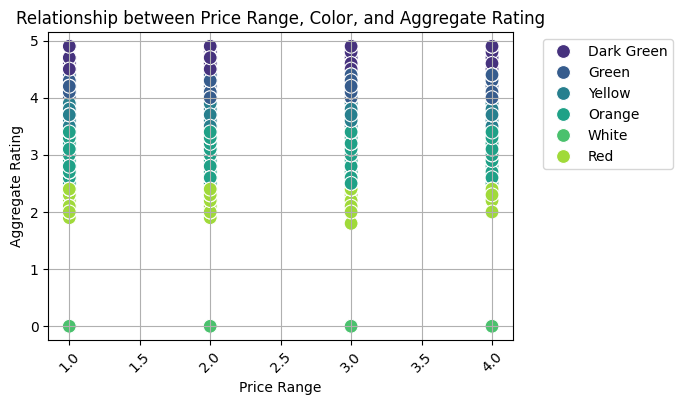

In [57]:

# Relationship between price range, color, and aggregate rating
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Price range', y='Aggregate rating', hue='Rating color', palette='viridis', s=100)
plt.title('Relationship between Price Range, Color, and Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### **Task3: Feature Engineering**

In [61]:
# Features from Existing Columns
df['Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)

# Convert categorical variables to binary features
df['Has Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

#drop original categorical variables
df.drop(['Has Table booking', 'Has Online delivery'], axis=1, inplace=True)

print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

## **Project Findings**

 **Task1: Table Booking and Online Delivery**

 25.66% and 12.12% of restaurants allow online delivery and table booking respectively.

Restaurants that offer table booking have high rating than those with no table booking.

Restaurants with low and medium prices are likely to offer online delivery with a percentage of 26% and 29% respectively. Unlike for those with high prices who offer online delivery of upto 9%.

**Task 2: Price Range Analysis**

1 is the most common price range across restaurants.

Restaurants in price range 4 received the highest average rating of 3.818 then price range 3 received 3.6833 then the rest.

Dark green color represents the highest agregate rating, the plot shows dark green color distributed along with the highest rating in all the price ranges.

**Task 3: Feature Engineering**

Creating'Restaurant Name Length' and 'Address Length,' coluns to show the length of restaurant names and addresses.

Converted columns, 'Has Table Booking' and 'Has Online Delivery'  to binary features by encoding categorical variables.

## **Conclusion**

The project concludes that 25.66% of the restaurants provide food delivery via the Internet whereas only 12.12% of the restaurants had reservation services for tables. Table booking outlets have higher ratings than the others. Those at low and mid ranges of prices have a high probability of being used for online ordering, i.e. 26 percent and 29 percent respectively. The most expensive meals are the least likely to be delivered online. The highest range in terms of price (from 1 to 4) has an average rating value of 3.818. The dark green color is for the highest rating across price ranges as shown in the plot the dark green color appears on top of the aggregate ratings. During feature engineering, new columns were created to include restaurant names and addresses while categorical variables were converted into binary features for further analysis purposes.
